In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import time

In [0]:

%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

In [0]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]

In [0]:
#!/usr/bin/python
# -*- coding: utf-8 -*-


class SigmoidNeuron:
  

  def __init__(self):
    self.w = None
    self.b = None
    self.wb=[]

  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
      
  def perceptronIN(self, x,ww,bb):
    return np.dot(x, ww.T) + bb

  def sigmoid(self, x):
    return 1.0 / (1.0 + np.exp(-x))
    
  def predict(self, X):
    yp = []
    for x in X:
      ypt=(self.sigmoid(self.perceptron(x)))
      yp.append(ypt)
    return yp

  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x

  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def rwb(self):
    return self.wb

  def fit(self,x,y,
        epochs=1,
        learning_rate=1,
        initialise=True,
        do_plot=False,
        ):
    if do_plot:
      loss={}
            
        
    if initialise:
      self.w = np.random.randn(1, 2)
      self.b = 0
      self.wb.append([self.w,[self.b]])

    for i in range(epochs):
      dw = 0
      db = 0
      dw += self.grad_w(x, y)
      db += self.grad_b(x, y)
                 
    self.w -= learning_rate * dw
    self.b -= learning_rate * db
    self.wb.append([self.w,self.b])
    if do_plot:
      loss[i]=mean_squared_error(self.sigmoid(self.perceptron(X)),Y)
    if do_plot:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Error')
      plt.show()


In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

In [0]:
sn=SigmoidNeuron()

In [0]:
def plot_sn(X,Y,sn,ax,wbb):
  X1=np.linspace(-10,10,100)
  X2=np.linspace(-10,10,100)
  XX1,XX2=np.meshgrid(X1,X2)
  YY=np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      YY[i,j]=sn.sigmoid(sn.perceptron(np.asarray([X1[j],X2[i]])))
  ax.contourf(XX1,XX2,YY,cmap=my_cmap,alpha=0.6)
  ax.scatter(X[:,0],X[:,1],c=Y,cmap=my_cmap)
  ax.plot()


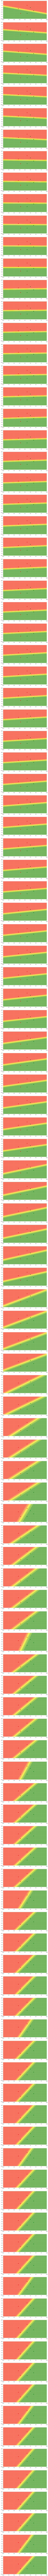

In [23]:

plt.figure(figsize=(10,20*6*5))
sn.fit([2.5,2.5],1,1,1,True,False)
ci=0
wbb=[]
for i in range(20):
  #ci=0
  for (x,y) in zip(X,Y):
    ci+=1
    ax=plt.subplot(20*6,1,ci)
    sn.fit(x,y,1,0.7,False,False)
    plot_sn(X,Y,sn,ax,wbb)
    


    
    
    

In [0]:
def plot_sn2(X,Y,sn,ax,i,ww,bb):
  
  X1=np.linspace(-10,10,100)
  X2=np.linspace(-10,10,100)
  XX1,XX2=np.meshgrid(X1,X2)
  YY=np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      YY[i,j]=sn.sigmoid(sn.perceptronIN(np.asarray([X1[j],X2[i]]),np.asarray(ww),bb))
  ax.contourf(XX1,XX2,YY,cmap=my_cmap,alpha=0.6)
  ax.scatter(X[:,0],X[:,1],c=Y,cmap=my_cmap)
  #ax.plot()

In [0]:

def animate(i):
  #ax.clear()
  
  #for m in range(i+1):
  for x,y in zip(X,Y):
    sn.fit(x,y,1,0.4,False,False)
    ax.clear()
    plot_sn2(X,Y,sn,ax,i,list(sn.w),sn.b[0])
  
  


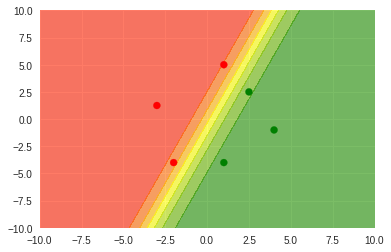

In [42]:
fig,ax = plt.subplots()
sn.fit([2.5,2.5],1,1,1,True,False)
rwb=sn.rwb()
interval = 3#in seconds     
anim = animation.FuncAnimation(fig, animate, 20,interval=interval*1e+3, repeat=False,blit=False)
HTML(anim.to_html5_video())